<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> FEATURE ENGEENERING**</span><br>


<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [2]:
# Libraries
import pandas as pd
import os # operating system    
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns   


In [3]:
print(os.getcwd()) 

/Users/miguelopez/Desktop/4-Proyecto ML/src/notebooks


<span style="color:green">**Feature Engeeniring**</span>
 <br>

In [7]:
# base directory variable, relative path os
BASE_DIR = '../4-Proyecto ML'
csv_path = os.path.join(BASE_DIR, 'src/data_raw/Carbon Emission.csv') 


In [9]:
 df=pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_raw/Carbon Emission.csv')

In [5]:
# Numerical and categorical features 

numerical = []
categorical = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerical.append(col)
    elif df[col].dtype == 'object':
        categorical.append(col)

print("Categorical: ",categorical)
print("Numerical: ",numerical)


NameError: name 'df' is not defined

In [5]:
# Categorical variables / LabelEncoder()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:
df.info

<bound method DataFrame.info of       Body Type  Sex  Diet  How Often Shower  Heating Energy Source  \
0             2    0     1                 0                      0   
1             1    0     3                 1                      2   
2             2    1     0                 2                      3   
3             2    1     0                 3                      3   
4             1    0     3                 0                      0   
...         ...  ...   ...               ...                    ...   
9995          1    1     0                 3                      0   
9996          0    0     2                 3                      0   
9997          2    0     3                 0                      1   
9998          3    1     2                 2                      0   
9999          1    1     1                 3                      3   

      Transport  Vehicle Type  Social Activity  Monthly Grocery Bill  \
0             1             5              

In [7]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,2,0,1,0,0,1,5,1,230,0,210,1,4,7,26,1,0,2,13,2238
1,1,0,3,1,2,2,5,1,114,2,9,0,3,9,38,5,0,2,9,1892
2,2,1,0,2,3,0,4,0,138,1,2472,3,1,14,47,6,1,2,5,2595
3,2,1,0,3,3,2,5,2,157,2,74,2,3,20,5,7,1,6,1,1074
4,1,0,3,0,0,0,0,1,266,3,8457,1,1,3,5,6,2,10,6,4743


In [8]:
df.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [9]:
# Corr table afer encoding 
corr = df.corr()
corr

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
Body Type,1.000000,0.014040,0.010534,-0.010093,-0.000659,0.008470,-0.000263,0.013090,-0.018614,0.002480,0.002603,0.016333,0.002141,-0.001862,0.009950,0.004911,0.022614,0.020433,0.004321,-0.064030
Sex,0.014040,1.000000,-0.001627,-0.013714,0.016998,-0.006570,-0.003392,-0.008710,0.015877,0.005699,-0.006622,0.011161,-0.001390,0.006698,0.001684,0.001834,0.011025,-0.004308,0.000986,0.163895
Diet,0.010534,-0.001627,1.000000,0.013389,0.013424,0.005945,0.004594,0.001257,-0.001500,-0.013725,-0.020636,0.004465,0.009882,-0.003321,0.006122,-0.013730,0.007806,0.007710,0.006166,-0.061477
How Often Shower,-0.010093,-0.013714,0.013389,1.000000,-0.012900,-0.009573,-0.004584,0.008459,0.013727,0.000650,0.024004,-0.004556,0.009326,-0.005151,0.014260,0.006073,0.007717,-0.027002,-0.003565,0.026564
Heating Energy Source,-0.000659,0.016998,0.013424,-0.012900,1.000000,0.005687,0.008320,0.019365,0.013205,-0.003072,-0.009193,-0.003451,0.006089,0.008844,0.003605,-0.003365,0.021464,-0.008092,-0.001183,-0.042718
Transport,0.008470,-0.006570,0.005945,-0.009573,0.005687,1.000000,0.750701,-0.004941,-0.008880,-0.003531,-0.745532,0.001706,0.002906,0.016215,-0.006890,0.003011,-0.018492,-0.002011,-0.003867,-0.440264
Vehicle Type,-0.000263,-0.003392,0.004594,-0.004584,0.008320,0.750701,1.000000,-0.001357,0.006159,-0.007194,-0.673585,0.015671,0.009669,0.003281,-0.006164,-0.006451,-0.017290,-0.001804,0.000569,-0.321170
Social Activity,0.013090,-0.008710,0.001257,0.008459,0.019365,-0.004941,-0.001357,1.000000,0.000262,-0.000334,-0.001967,0.014069,0.011018,-0.001942,-0.000481,0.025146,0.019561,-0.006502,0.009167,0.017535
Monthly Grocery Bill,-0.018614,0.015877,-0.001500,0.013727,0.013205,-0.008880,0.006159,0.000262,1.000000,-0.012557,0.015801,-0.021008,0.002343,-0.010318,0.006746,0.012798,0.018164,0.004629,0.005682,0.081587
Frequency of Traveling by Air,0.002480,0.005699,-0.013725,0.000650,-0.003072,-0.003531,-0.007194,-0.000334,-0.012557,1.000000,0.009364,0.015047,-0.017697,0.003699,-0.006209,-0.012362,0.007726,-0.000007,0.005301,0.245712


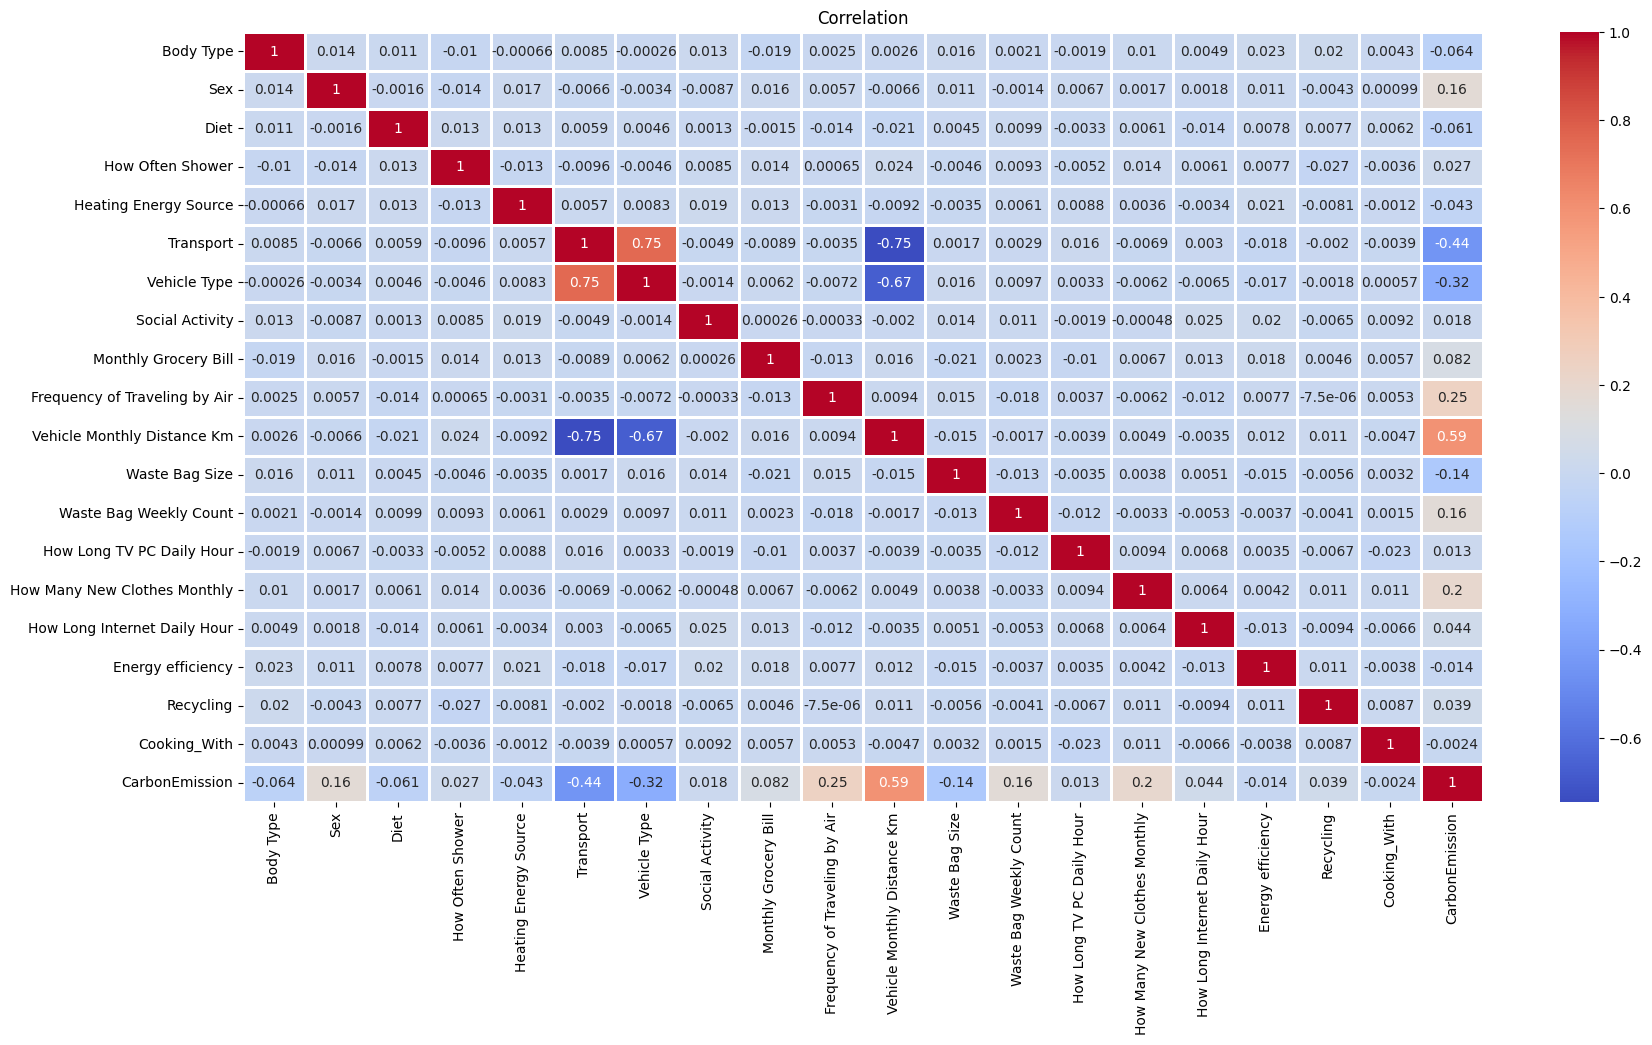

In [10]:
# Correlation Matrix 
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation')
plt.show()

<span style="color:green">**Pre-processing**</span>
 <br>


In [11]:
# Split data / convert to numpy array
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [13]:
#Scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
# Standardize the range(training data)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [16]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,2,0,1,0,0,1,5,1,230,0,210,1,4,7,26,1,0,2,13,2238
1,1,0,3,1,2,2,5,1,114,2,9,0,3,9,38,5,0,2,9,1892
2,2,1,0,2,3,0,4,0,138,1,2472,3,1,14,47,6,1,2,5,2595
3,2,1,0,3,3,2,5,2,157,2,74,2,3,20,5,7,1,6,1,1074
4,1,0,3,0,0,0,0,1,266,3,8457,1,1,3,5,6,2,10,6,4743


In [15]:
# Save preprocessed df to df_scaled.csv file 
df.to_csv('df_scaled.csv', index=False)

<!-- gridsearch / validacion cruzada -->